## Imports

In [31]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import tensorflow as tf
print(tf.__version__)

#Unet network
def unet(pretrained_weights = None,input_size = (512,512,1)):
    #size filter input
    size_filter_in = 16
    #normal initialization of weights
    kernel_init = 'he_normal'
    #To apply leaky relu after the conv layer
    activation_layer = None
    inputs = Input(input_size)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(inputs)
    conv1 = LeakyReLU()(conv1)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv1)
    conv1 = LeakyReLU()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool1)
    conv2 = LeakyReLU()(conv2)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv2)
    conv2 = LeakyReLU()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool2)
    conv3 = LeakyReLU()(conv3)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv3)
    conv3 = LeakyReLU()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool3)
    conv4 = LeakyReLU()(conv4)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv4)
    conv4 = LeakyReLU()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool4)
    conv5 = LeakyReLU()(conv5)
    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv5)
    conv5 = LeakyReLU()(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
    up6 = LeakyReLU()(up6)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge6)
    conv6 = LeakyReLU()(conv6)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv6)
    conv6 = LeakyReLU()(conv6)
    up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv6))
    up7 = LeakyReLU()(up7)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge7)
    conv7 = LeakyReLU()(conv7)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv7)
    conv7 = LeakyReLU()(conv7)
    up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
    up8 = LeakyReLU()(up8)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge8)
    conv8 = LeakyReLU()(conv8)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv8)
    conv8 = LeakyReLU()(conv8)

    up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
    up9 = LeakyReLU()(up9)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
    conv9 = LeakyReLU()(conv9)
    conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

    model = Model(inputs,conv10)

    model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])

    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


2.19.0


In [32]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ML_audio/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
import librosa
import os, inspect
import pathlib
# ==== paths ====
currentdir = os.getcwd()
datadir = f"{currentdir}/data"
# file_no_dolby = "ELO_1_raw.wav"
# file_dolby    = "ELO_1_clean.wav"
# file_no_dolby = "ELO_1-2.wav"
# file_dolby    = "ELO_1_clean-3.wav"
file_no_dolby = "AUDIO_all.wav"
file_dolby    = "AUDIO_all_clean.wav"

# ==== audio params ====
sr = 44100

# frame_length = 32768        # ~0.74 sec
# hop_length_frame = 32768   # 50% overlap

# # ==== spectrogram params ====
# dim_square_spec = 128
# n_fft = 255
# hop_length_fft = 256

frame_length = 262144        # ~0.74 sec
hop_length_frame = 131072   # 50% overlap

# ==== spectrogram params ====
dim_square_spec = 512
n_fft = 1023
hop_length_fft = 512


In [34]:
y_no_dolby, sr1 = librosa.load(
    os.path.join(root_path, file_no_dolby),
    sr=sr,
    mono=True
)

y_dolby, sr2 = librosa.load(
    os.path.join(root_path, file_dolby),
    sr=sr,
    mono=True
)

print("No Dolby length:", y_no_dolby.shape[0])
print("Dolby length   :", y_dolby.shape[0])


No Dolby length: 265235484
Dolby length   : 265235484


In [35]:
def audio_to_audio_frame_stack(sound_data, frame_length, hop_length_frame):
    """This function take an audio and split into several frame
       in a numpy matrix of size (nb_frame,frame_length)"""

    sequence_sample_length = sound_data.shape[0]

    sound_data_list = [sound_data[start:start + frame_length] for start in range(
    0, sequence_sample_length - frame_length + 1, hop_length_frame)]  # get sliding windows
    sound_data_array = np.vstack(sound_data_list)

    return sound_data_array

In [36]:
frames_no = audio_to_audio_frame_stack(
    y_no_dolby, frame_length, hop_length_frame
)

frames_do = audio_to_audio_frame_stack(
    y_dolby, frame_length, hop_length_frame
)

print(frames_no.shape, frames_do.shape)


(2022, 262144) (2022, 262144)


In [37]:
def audio_to_magnitude_db_and_phase(n_fft, hop_length_fft, audio):
    """This function takes an audio and convert into spectrogram,
       it returns the magnitude in dB and the phase"""

    stftaudio = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length_fft)
    stftaudio_magnitude, stftaudio_phase = librosa.magphase(stftaudio)

    stftaudio_magnitude_db = librosa.amplitude_to_db(
        stftaudio_magnitude, ref=1.0, top_db=80.0)

    return stftaudio_magnitude_db, stftaudio_phase

In [38]:
def numpy_audio_to_matrix_spectrogram(numpy_audio, dim_square_spec, n_fft, hop_length_fft):
    """This function takes as input a numpy audi of size (nb_frame,frame_length), and return
    a numpy containing the matrix spectrogram for amplitude in dB and phase. It will have the size
    (nb_frame,dim_square_spec,dim_square_spec)"""

    nb_audio = numpy_audio.shape[0]

    m_mag_db = np.zeros((nb_audio, dim_square_spec, dim_square_spec))
    m_phase = np.zeros((nb_audio, dim_square_spec, dim_square_spec), dtype=complex)

    for i in range(nb_audio):
        m_mag_db[i, :, :], m_phase[i, :, :] = audio_to_magnitude_db_and_phase(
            n_fft, hop_length_fft, numpy_audio[i])

    return m_mag_db, m_phase

In [39]:
X_mag_db, X_phase = numpy_audio_to_matrix_spectrogram(
    frames_no,
    dim_square_spec,
    n_fft,
    hop_length_fft
)

# Spectrograms for DOLBY (target)
Y_mag_db, Y_phase = numpy_audio_to_matrix_spectrogram(
    frames_do,
    dim_square_spec,
    n_fft,
    hop_length_fft
)

print(X_mag_db.shape, Y_mag_db.shape)


(2022, 512, 512) (2022, 512, 512)


In [40]:
X_in = X_mag_db
# X_ou = X_in - Y_mag_db
X_ou = Y_mag_db


In [41]:
print("Min/Max of input:", np.min(X_in), np.max(X_in))

Min/Max of input: -95.12834930419922 38.30191421508789


In [42]:
def scaled_in(matrix_spec):
    "global scaling apply to noisy voice spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec / 40.0) + 1.0
    return matrix_spec

def scaled_ou(matrix_spec):
    "global scaling apply to noise models spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec / 40.0) + 1.0
    return matrix_spec

In [43]:
X_in = scaled_in(X_in)
X_ou = scaled_ou(X_ou)


In [44]:
print("Min/Max of scaled input:", np.min(X_in), np.max(X_in))

Min/Max of scaled input: -1.3782087326049806 1.9575478553771972


In [45]:
from scipy import stats
print(stats.describe(X_in.reshape(-1,1)))
print(stats.describe(X_ou.reshape(-1,1)))
print(X_in.shape, X_ou.shape)


DescribeResult(nobs=np.int64(530055168), minmax=(array([-1.37820873]), array([1.95754786])), mean=array([0.39894812]), variance=array([0.15947216]), skewness=array([0.46630893]), kurtosis=array([-0.32698634]))
DescribeResult(nobs=np.int64(530055168), minmax=(array([-1.38542366]), array([1.95755644])), mean=array([0.32180943]), variance=array([0.20356778]), skewness=array([0.39575252]), kurtosis=array([-0.54599844]))
(2022, 512, 512) (2022, 512, 512)


In [46]:
X_in = X_in.reshape(X_in.shape[0], X_in.shape[1], X_in.shape[2], 1)
X_ou = X_ou.reshape(X_ou.shape[0], X_ou.shape[1], X_ou.shape[2], 1)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_in, X_ou, test_size=0.1, random_state=42)


In [48]:
import tensorflow as tf

# Check available GPUs (TensorFlow 2.x way)
print("GPUs available:", tf.config.list_physical_devices('GPU'))
print("Devices visible to TensorFlow:")
for device in tf.config.list_physical_devices():
    print(device)


GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Devices visible to TensorFlow:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint

generator_nn = unet()
generator_nn.summary()
checkpoint = ModelCheckpoint('model_best.h5', monitor='val_loss', save_best_only=True)
history = generator_nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=80, callbacks=[checkpoint])


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 512, 512,  │        160 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_23      │ (None, 512, 512,  │          0 │ conv2d_24[0][0]   │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 512, 512,  │      2,320 │ leaky_re_lu_23[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_24      │ (None, 512, 512,  │          0 │ conv2d_25[0][0]   │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 256, 256,  │          0 │ leaky_re_lu_24[0… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 256, 256,  │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_25      │ (None, 256, 256,  │          0 │ conv2d_26[0][0]   │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 256, 256,  │      9,248 │ leaky_re_lu_25[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_26      │ (None, 256, 256,  │          0 │ conv2d_27[0][0]   │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 128, 128,  │          0 │ leaky_re_lu_26[0… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_27      │ (None, 128, 128,  │          0 │ conv2d_28[0][0]   │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 128, 128,  │     36,928 │ leaky_re_lu_27[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_28      │ (None, 128, 128,  │          0 │ conv2d_29[0][0]   │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 64, 64,    │          0 │ leaky_re_lu_28[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_6[

 Total params: 1,941,093 (7.40 MB)

 Trainable params: 1,941,093 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 711ms/step - loss: 0.2323 - mae: 0.5602

23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 879ms/step - loss: 0.2329 - mae: 0.5606 - val_loss: 0.3162 - val_mae: 0.7002
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - loss: 0.1773 - mae: 0.4635

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 453ms/step - loss: 0.1740 - mae: 0.4575 - val_loss: 0.0454 - val_mae: 0.2333
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - loss: 0.0208 - mae: 0.1558 - val_loss: 0.0763 - val_mae: 0.3349
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - loss: 0.0133 - mae: 0.1216 - val_loss: 0.0710 - val_mae: 0.3165
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - loss: 0.0114 - mae: 0.1110 - val_loss: 0.0598 - val_mae: 0.2716
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 445ms/step - loss: 0.0103 - mae: 0.1046 - val_loss: 0.0549 - val_mae: 0.2533
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - loss: 0.0093 - mae: 0.0988 - val_loss: 0.0537 - val_mae: 0.2480
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - loss: 0.0088 - mae: 0.0948 - val_loss: 0.0459 - val_mae: 0.2251
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - loss: 0.0083 - mae: 0.0918

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 454ms/step - loss: 0.0083 - mae: 0.0917 - val_loss: 0.0432 - val_mae: 0.2180
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 449ms/step - loss: 0.0079 - mae: 0.0886 - val_loss: 0.0443 - val_mae: 0.2209
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - loss: 0.0075 - mae: 0.0862

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 453ms/step - loss: 0.0075 - mae: 0.0862 - val_loss: 0.0395 - val_mae: 0.2053
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - loss: 0.0073 - mae: 0.0843 - val_loss: 0.0424 - val_mae: 0.2170
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - loss: 0.0069 - mae: 0.0814 - val_loss: 0.0433 - val_mae: 0.2191
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - loss: 0.0068 - mae: 0.0798

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 454ms/step - loss: 0.0068 - mae: 0.0798 - val_loss: 0.0353 - val_mae: 0.1920
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - loss: 0.0065 - mae: 0.0775

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 453ms/step - loss: 0.0065 - mae: 0.0775 - val_loss: 0.0339 - val_mae: 0.1882
Epoch 16/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - loss: 0.0061 - mae: 0.0733 - val_loss: 0.0366 - val_mae: 0.1980
Epoch 17/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - loss: 0.0063 - mae: 0.0750

23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 456ms/step - loss: 0.0063 - mae: 0.0749 - val_loss: 0.0317 - val_mae: 0.1820
Epoch 18/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - loss: 0.0057 - mae: 0.0683 - val_loss: 0.0347 - val_mae: 0.1902
Epoch 19/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - loss: 0.0054 - mae: 0.0652

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 454ms/step - loss: 0.0054 - mae: 0.0652 - val_loss: 0.0307 - val_mae: 0.1752
Epoch 20/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - loss: 0.0053 - mae: 0.0642 - val_loss: 0.0337 - val_mae: 0.1857
Epoch 21/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - loss: 0.0053 - mae: 0.0644 - val_loss: 0.0352 - val_mae: 0.1880
Epoch 22/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - loss: 0.0051 - mae: 0.0612 - val_loss: 0.0321 - val_mae: 0.1775
Epoch 23/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - loss: 0.0051 - mae: 0.0619 - val_loss: 0.0359 - val_mae: 0.1900
Epoch 24/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - loss: 0.0050 - mae: 0.0614 - val_loss: 0.0345 - val_mae: 0.1851
Epoch 25/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - loss: 0.0050 - mae: 0.0609 - val_loss: 0.0392 - val_mae: 0.1996
Epoch 26/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - loss: 0.0048 - mae: 0.0585 - val_loss: 0.0420 - val_mae: 0.2138
Epoch 27/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/ste

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 453ms/step - loss: 0.0045 - mae: 0.0544 - val_loss: 0.0306 - val_mae: 0.1760
Epoch 45/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - loss: 0.0044 - mae: 0.0531 - val_loss: 0.0317 - val_mae: 0.1813
Epoch 46/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - loss: 0.0043 - mae: 0.0524 - val_loss: 0.0308 - val_mae: 0.1800
Epoch 47/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - loss: 0.0044 - mae: 0.0536 - val_loss: 0.0312 - val_mae: 0.1807
Epoch 48/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - loss: 0.0043 - mae: 0.0518 - val_loss: 0.0334 - val_mae: 0.1891
Epoch 49/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - loss: 0.0044 - mae: 0.0530

23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 454ms/step - loss: 0.0044 - mae: 0.0530 - val_loss: 0.0302 - val_mae: 0.1797
Epoch 50/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - loss: 0.0043 - mae: 0.0522

23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 454ms/step - loss: 0.0043 - mae: 0.0522 - val_loss: 0.0298 - val_mae: 0.1773


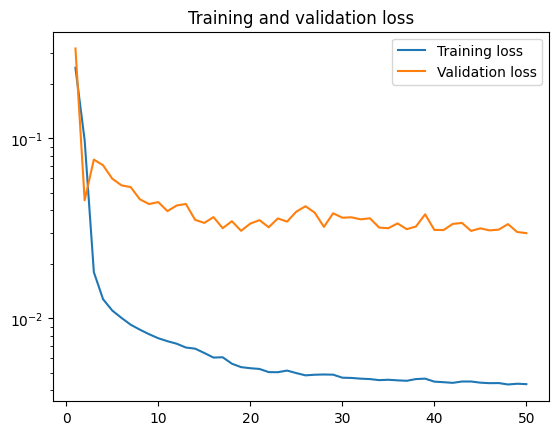

In [50]:
#Plot training and validation loss
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.yscale('log')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [51]:
#Predict and QC the output
X_pred_test = generator_nn.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step


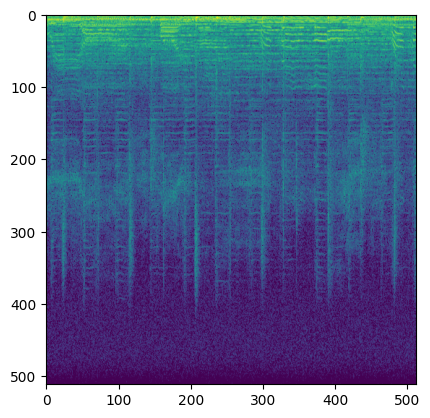

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
id = 20
plt.imshow(X_test[id,:,:,0])

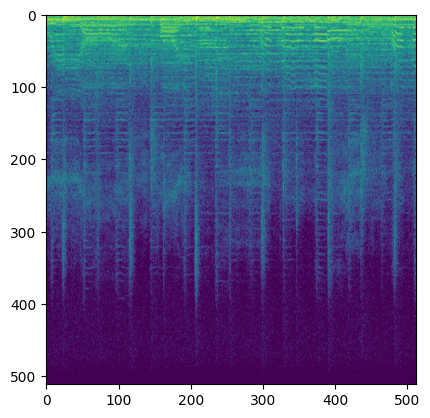

In [53]:
plt.imshow(y_test[id,:,:,0])

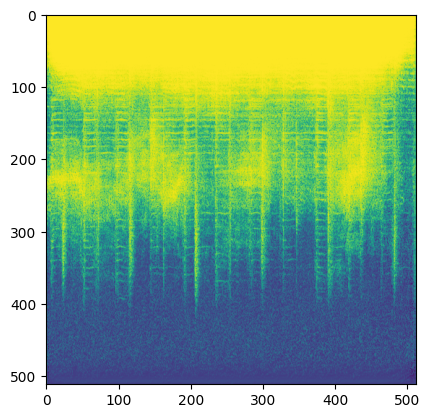

In [55]:
plt.imshow(X_pred_test[id,:,:,0])

In [56]:
X_pred_test.max(), X_pred_test.min()

(np.float32(1.0), np.float32(-0.98130196))

In [57]:
generator_nn.save(root_path + 'model_best_v4.keras')
print("Saved model to disk")

Saved model to disk


In [58]:
# Save model structure to disk
model_json = generator_nn.to_json()
with open(root_path + "mod_unet_last_weights_v9.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
generator_nn.save_weights(root_path + "mod_unet_last_weights_v9.weights.h5")
print("Saved model to disk (structure + weights separately)")


Saved model to disk (structure + weights separately)
